In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [6]:
df =pd.read_csv('cities_by_hours.csv',parse_dates=['Datetime'])

In [7]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [8]:
df.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'C6H6', 'C7H8', 'C8H10', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [9]:
df.shape

(707875, 16)

In [10]:
df.dtypes

City                  object
Datetime      datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
C6H6                 float64
C7H8                 float64
C8H10                float64
AQI                  float64
AQI_Bucket            object
dtype: object

<AxesSubplot:xlabel='AQI', ylabel='City'>

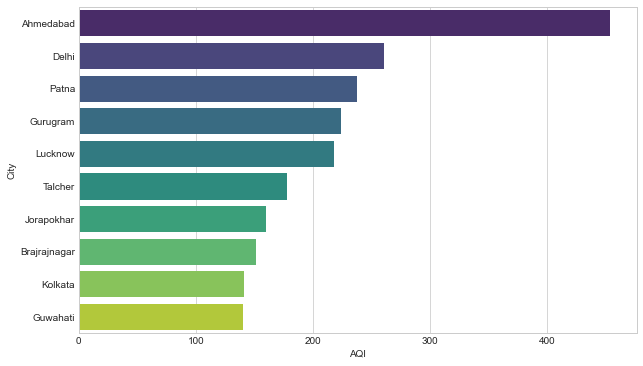

In [11]:
#Grouping the AQI by city and calculating the average AQI per city
x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(data=x,x='AQI',y='City',orient='h',palette='viridis')

In [12]:
def missing_value(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
missing_value(df)

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
C8H10,455829,64.4
PM10,296737,41.9
NH3,272542,38.5
C7H8,220607,31.2
C6H6,163646,23.1
PM2.5,145088,20.5
SO2,130373,18.4
O3,129208,18.3
AQI,129080,18.2
AQI_Bucket,129080,18.2


<AxesSubplot:>

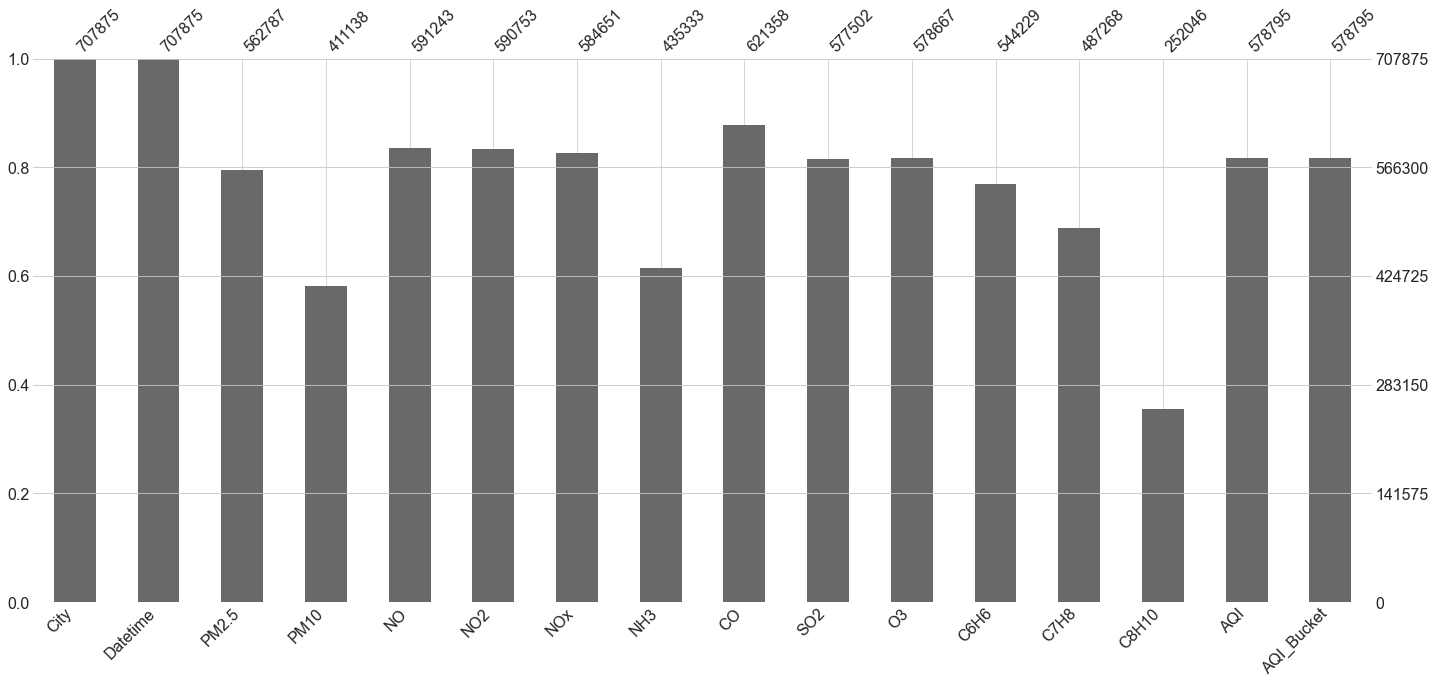

In [15]:
msno.bar(df)

<AxesSubplot:>

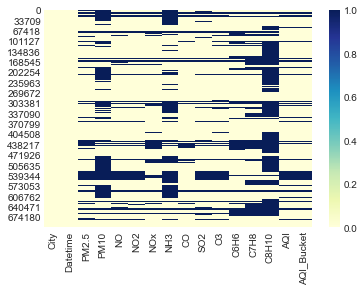

In [16]:
sns.heatmap(df.isnull(),cmap="YlGnBu")

In [17]:
df.iloc[:,1:14]=df.groupby("City").transform(lambda x:x.fillna(x.mean()))

<AxesSubplot:>

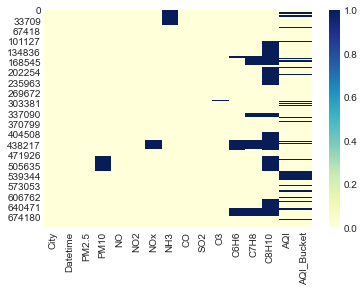

In [18]:
sns.heatmap(df.isnull(),cmap="YlGnBu")

In [19]:
df.isnull().sum()

City               0
Datetime           0
PM2.5              0
PM10           48192
NO                 0
NO2                0
NOx            28025
NH3            48192
CO                 0
SO2                0
O3              3852
C6H6           65433
C7H8           96049
C8H10         312656
AQI           129080
AQI_Bucket    129080
dtype: int64

In [20]:
#df.iloc[:,:3:14]=df.fillna(df.iloc[:,3:14].mean())
df['PM10']=df['PM10'].fillna((df['PM10'].mean()))
df['NOx']=df['NOx'].fillna((df['NOx'].mean()))
df['NH3']=df['NH3'].fillna((df['NH3'].mean()))
df['O3']=df['O3'].fillna((df['O3'].mean()))
df['C6H6']=df['C6H6'].fillna((df['C6H6'].mean()))
df['C7H8']=df['C7H8'].fillna((df['C7H8'].mean()))
df['C8H10']=df['C8H10'].fillna((df['C8H10'].mean()))

In [21]:
df.isnull().sum()

City               0
Datetime           0
PM2.5              0
PM10               0
NO                 0
NO2                0
NOx                0
NH3                0
CO                 0
SO2                0
O3                 0
C6H6               0
C7H8               0
C8H10              0
AQI           129080
AQI_Bucket    129080
dtype: int64

In [22]:
def aqi_calc(df):
    df["PM10_24hr_avg"] = df.groupby("City")["PM10"].rolling(window = 24, min_periods = 16).mean().values
    df["PM2.5_24hr_avg"] = df.groupby("City")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
    df["SO2_24hr_avg"] = df.groupby("City")["SO2"].rolling(window = 24, min_periods = 16).mean().values
    df["NOx_24hr_avg"] = df.groupby("City")["NOx"].rolling(window = 24, min_periods = 16).mean().values
    df["NH3_24hr_avg"] = df.groupby("City")["NH3"].rolling(window = 24, min_periods = 16).mean().values
    df["CO_8hr_max"] = df.groupby("City")["CO"].rolling(window = 8, min_periods = 1).max().values
    df["O3_8hr_max"] = df.groupby("City")["O3"].rolling(window = 8, min_periods = 1).max().values


In [23]:
aqi_calc(df)

In [24]:
df.isnull().sum()

City                   0
Datetime               0
PM2.5                  0
PM10                   0
NO                     0
NO2                    0
NOx                    0
NH3                    0
CO                     0
SO2                    0
O3                     0
C6H6                   0
C7H8                   0
C8H10                  0
AQI               129080
AQI_Bucket        129080
PM10_24hr_avg        390
PM2.5_24hr_avg       390
SO2_24hr_avg         390
NOx_24hr_avg         390
NH3_24hr_avg         390
CO_8hr_max             0
O3_8hr_max             0
dtype: int64

In [25]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
        if x <= 30:
            return x * 50 / 30
        elif x <= 60:
            return 50 + (x - 30) * 50 / 30
        elif x <= 90:
            return 100 + (x - 60) * 100 / 30
        elif x <= 120:
            return 200 + (x - 90) * 100 / 30
        elif x <= 250:
            return 300 + (x - 120) * 100 / 130
        elif x > 250:
            return 400 + (x - 250) * 100 / 130
        else:
            return 0


df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

    ## PM10 Sub-Index calculation
def get_PM10_subindex(x):
        if x <= 50:
            return x
        elif x <= 100:
            return x
        elif x <= 250:
            return 100 + (x - 100) * 100 / 150
        elif x <= 350:
            return 200 + (x - 250)
        elif x <= 430:
            return 300 + (x - 350) * 100 / 80
        elif x > 430:
            return 400 + (x - 430) * 100 / 80
        else:
            return 0

df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))



    ## SO2 Sub-Index calculation
def get_SO2_subindex(x):
        if x <= 40:
            return x * 50 / 40
        elif x <= 80:
            return 50 + (x - 40) * 50 / 40
        elif x <= 380:
            return 100 + (x - 80) * 100 / 300
        elif x <= 800:
            return 200 + (x - 380) * 100 / 420
        elif x <= 1600:
            return 300 + (x - 800) * 100 / 800
        elif x > 1600:
            return 400 + (x - 1600) * 100 / 800
        else:
            return 0

df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))
    ## NOx Sub-Index calculation
def get_NOx_subindex(x):
        if x <= 40:
            return x * 50 / 40
        elif x <= 80:
            return 50 + (x - 40) * 50 / 40
        elif x <= 180:
            return 100 + (x - 80) * 100 / 100
        elif x <= 280:
            return 200 + (x - 180) * 100 / 100
        elif x <= 400:
            return 300 + (x - 280) * 100 / 120
        elif x > 400:
            return 400 + (x - 400) * 100 / 120
        else:
            return 0

df["NOx_SubIndex"] = df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

    ## NH3 Sub-Index calculation
def get_NH3_subindex(x):
        if x <= 200:
            return x * 50 / 200
        elif x <= 400:
            return 50 + (x - 200) * 50 / 200
        elif x <= 800:
            return 100 + (x - 400) * 100 / 400
        elif x <= 1200:
            return 200 + (x - 800) * 100 / 400
        elif x <= 1800:
            return 300 + (x - 1200) * 100 / 600
        elif x > 1800:
            return 400 + (x - 1800) * 100 / 600
        else:
            return 0

df["NH3_SubIndex"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

    ## CO Sub-Index calculation
def get_CO_subindex(x):
        if x <= 1:
            return x * 50 / 1
        elif x <= 2:
            return 50 + (x - 1) * 50 / 1
        elif x <= 10:
            return 100 + (x - 2) * 100 / 8
        elif x <= 17:
            return 200 + (x - 10) * 100 / 7
        elif x <= 34:
            return 300 + (x - 17) * 100 / 17
        elif x > 34:
            return 400 + (x - 34) * 100 / 17
        else:
            return 0

df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

    ## O3 Sub-Index calculation
def get_O3_subindex(x):
        if x <= 50:
            return x * 50 / 50
        elif x <= 100:
            return 50 + (x - 50) * 50 / 50
        elif x <= 168:
            return 100 + (x - 100) * 100 / 68
        elif x <= 208:
            return 200 + (x - 168) * 100 / 40
        elif x <= 748:
            return 300 + (x - 208) * 100 / 539
        elif x > 748:
            return 400 + (x - 400) * 100 / 539
        else:
            return 0

df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))
    ## AQI bucketing
def get_AQI_bucket(x):
        if x <= 50:
            return "Good"
        elif x <= 100:
            return "Satisfactory"
        elif x <= 200:
            return "Moderate"
        elif x <= 300:
            return "Poor"
        elif x <= 400:
            return "Very Poor"
        elif x > 400:
            return "Severe"
        else:
            return np.NaN

df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                    (df["PM10_SubIndex"] > 0).astype(int) + \
                    (df["SO2_SubIndex"] > 0).astype(int) + \
                    (df["NOx_SubIndex"] > 0).astype(int) + \
                    (df["NH3_SubIndex"] > 0).astype(int) + \
                    (df["CO_SubIndex"] > 0).astype(int) + \
                    (df["O3_SubIndex"] > 0).astype(int)

df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                     "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df[~df.AQI_calculated.isna()].head(13)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
15,Ahmedabad,2015-01-01 16:00:00,67.273271,111.493008,0.87,17.28,18.32,23.012932,0.87,17.83,...,124.244236,107.662005,42.429688,20.088281,5.753233,103.375,132.470588,7,132.0,Moderate
16,Ahmedabad,2015-01-01 17:00:00,67.273271,111.493008,0.80,19.04,20.00,23.012932,0.80,16.14,...,124.244236,107.662005,41.120588,20.377206,5.753233,103.375,249.050000,7,249.0,Poor
17,Ahmedabad,2015-01-01 18:00:00,67.273271,111.493008,0.47,21.24,22.70,23.012932,0.47,11.93,...,124.244236,107.662005,39.664583,20.821528,5.753233,103.375,249.050000,7,249.0,Poor
18,Ahmedabad,2015-01-01 19:00:00,67.273271,111.493008,0.53,25.63,27.42,23.012932,0.53,14.99,...,124.244236,107.662005,38.563158,21.529605,5.753233,92.500,249.050000,7,249.0,Poor
19,Ahmedabad,2015-01-01 20:00:00,67.273271,111.493008,0.47,16.22,16.00,23.012932,0.47,13.66,...,124.244236,107.662005,37.488750,21.453125,5.753233,92.500,249.050000,7,249.0,Poor
20,Ahmedabad,2015-01-01 21:00:00,67.273271,111.493008,0.83,16.50,17.52,23.012932,0.83,13.28,...,124.244236,107.662005,36.494048,21.474405,5.753233,92.500,249.050000,7,249.0,Poor
21,Ahmedabad,2015-01-01 22:00:00,67.273271,111.493008,0.85,17.97,18.18,23.012932,0.85,12.23,...,124.244236,107.662005,35.530114,21.531250,5.753233,47.500,249.050000,7,249.0,Poor
22,Ahmedabad,2015-01-01 23:00:00,67.273271,111.493008,1.08,15.52,15.40,23.012932,1.08,10.50,...,124.244236,107.662005,34.555978,21.432065,5.753233,54.000,249.050000,7,249.0,Poor
23,Ahmedabad,2015-01-02 00:00:00,67.273271,111.493008,0.60,14.84,13.53,23.012932,0.60,9.12,...,124.244236,107.662005,33.591146,21.243750,5.753233,54.000,249.050000,7,249.0,Poor
24,Ahmedabad,2015-01-02 01:00:00,67.273271,111.493008,0.18,11.91,8.87,23.012932,0.18,12.95,...,124.244236,107.662005,27.907812,19.811458,5.753233,54.000,248.550000,7,249.0,Poor


In [26]:
df.drop(['AQI','AQI_Bucket'],axis=1,inplace=True)

In [27]:
df.dropna(inplace=True,axis=0)

In [28]:
df.shape

(707485, 31)

In [29]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['City']=label_encoder.fit_transform(df['City'])
df['City'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [30]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
15,0,2015-01-01 16:00:00,67.273271,111.493008,0.87,17.28,18.32,23.012932,0.87,17.83,...,124.244236,107.662005,42.429688,20.088281,5.753233,103.375,132.470588,7,132.0,Moderate
16,0,2015-01-01 17:00:00,67.273271,111.493008,0.80,19.04,20.00,23.012932,0.80,16.14,...,124.244236,107.662005,41.120588,20.377206,5.753233,103.375,249.050000,7,249.0,Poor
17,0,2015-01-01 18:00:00,67.273271,111.493008,0.47,21.24,22.70,23.012932,0.47,11.93,...,124.244236,107.662005,39.664583,20.821528,5.753233,103.375,249.050000,7,249.0,Poor
18,0,2015-01-01 19:00:00,67.273271,111.493008,0.53,25.63,27.42,23.012932,0.53,14.99,...,124.244236,107.662005,38.563158,21.529605,5.753233,92.500,249.050000,7,249.0,Poor
19,0,2015-01-01 20:00:00,67.273271,111.493008,0.47,16.22,16.00,23.012932,0.47,13.66,...,124.244236,107.662005,37.488750,21.453125,5.753233,92.500,249.050000,7,249.0,Poor


In [31]:
df.to_csv('Neha_City_hour_after_mean_AQI_Imputation.csv',index=False)